In [23]:
import scipy.io 
import numpy as np
import os
import time
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
from astropy import stats
from shutil import copy

In [24]:
# read in the IDL sav files from the analysis
analysis = scipy.io.readsav('/Users/hwakeford/Documents/GitHub/HST_Marginalization/outputs/analysis_circle_G141_wl_time_wm3d.sav', verbose=False)
IDL_sys_stats = analysis['sys_stats']
IDL_sys_date = analysis['sys_date']
IDL_sys_phase = analysis['sys_phase']
IDL_sys_rawflux = analysis['sys_rawflux']
IDL_sys_rawflux_err = analysis['sys_rawflux_err']
IDL_sys_flux  = analysis['sys_flux']
IDL_sys_flux_err  = analysis['sys_flux_err']
IDL_sys_residuals  = analysis['sys_residuals']
IDL_sys_model = analysis['sys_model']
IDL_sys_model_phase = analysis['sys_model_phase']
IDL_sys_systematic_model  = analysis['sys_systematic_model']
IDL_sys_params  = analysis['sys_params']
IDL_sys_params_err  = analysis['sys_params_err']
IDL_sys_depth  = analysis['sys_depth']
IDL_sys_depth_err = analysis['sys_depth_err']
IDL_sys_epoch  = analysis['sys_epoch']
IDL_sys_epoch_err  = analysis['sys_epoch_err']
IDL_sys_evidenceaic  = analysis['sys_evidenceaic']
IDL_sys_evidencebic  = analysis['sys_evidencebic']

# read in the IDL sav files from the Margainalisation 
marg = scipy.io.readsav('/Users/hwakeford/Documents/GitHub/HST_Marginalization/outputs/analysis_circle_G141_marginalised_wl_time_wm3d.sav', verbose=False)

IDL_w_q = marg['w_q']
IDL_best_sys = marg['best_sys']
IDL_marg_rl = marg['marg_rl']
IDL_marg_rl_err = marg['marg_rl_err']
IDL_marg_epoch = marg['marg_epoch']
IDL_marg_epoch_err = marg['marg_epoch_err']
IDL_rl_sdnr  = marg['rl_sdnr']
IDL_pos  = marg['pos']

In [25]:

# read in the Python save files for the analysis
py_analysis = np.load('/Users/hwakeford/Documents/GitHub/HST_Marginalization/outputs/analysis_circle_G141_wl_time_wm3d.npz')

py_sys_stats = (py_analysis['sys_stats'])
py_sys_date = (py_analysis['sys_date'])
py_sys_phase = (py_analysis['sys_phase'])
py_sys_rawflux = (py_analysis['sys_rawflux'])
py_sys_rawflux_err = (py_analysis['sys_rawflux_err'])
py_sys_flux = (py_analysis['sys_flux'])
py_sys_flux_err = (py_analysis['sys_flux_err'])
py_sys_residuals = (py_analysis['sys_residuals'])
py_sys_model = (py_analysis['sys_model'])
py_sys_model_phase = (py_analysis['sys_model_phase'])
py_sys_systematic_model = (py_analysis['sys_systematic_model'])
py_sys_params = (py_analysis['sys_params'])
py_sys_params_err = (py_analysis['sys_params_err'])
py_sys_depth = (py_analysis['sys_depth'])
py_sys_depth_err = (py_analysis['sys_depth_err'])
py_sys_epoch = (py_analysis['sys_epoch'])
py_sys_epoch_err = (py_analysis['sys_epoch_err'])
py_sys_evidenceAIC = (py_analysis['sys_evidenceAIC'])
py_sys_evidenceBIC = (py_analysis['sys_evidenceBIC'])


# read in the Python save files for the marginalisationa
py_marg = np.load('/Users/hwakeford/Documents/GitHub/HST_Marginalization/outputs/analysis_circle_G141_marginalised_wl_time_wm3d.npz')

py_w_q = (py_marg['w_q'])
py_best_sys = (py_marg['best_sys'])
py_marg_rl = (py_marg['marg_rl'])
py_marg_rl_err = (py_marg['marg_rl_err']) 
py_marg_epoch = (py_marg['marg_epoch'])
py_marg_epoch_err = (py_marg['marg_epoch_err']) 
py_marg_inclin_rad = (py_marg['marg_inclin_rad']) 
py_marg_inclin_rad_err = (py_marg['marg_inclin_rad_err']) 
py_marg_inclin_deg = (py_marg['marg_inclin_deg'])
py_marg_inclin_deg_err = (py_marg['marg_inclin_deg_err']) 
py_marg_msmpr = (py_marg['marg_msmpr']) 
py_marg_msmpr_err = (py_marg['marg_msmpr_err']) 
py_marg_aors = (py_marg['marg_aors']) 
py_marg_aors_err = (py_marg['marg_aors_err']) 
py_rl_sdnr = (py_marg['rl_sdnr']) 
py_pos = (py_marg['pos'])


TEST Results
-----------------
IDL Marg depth =  0.12401762639296991  +/-  9.670111678898093e-05
PY Marg depth =  0.12401780430381822  +/-  0.00019283957547112186


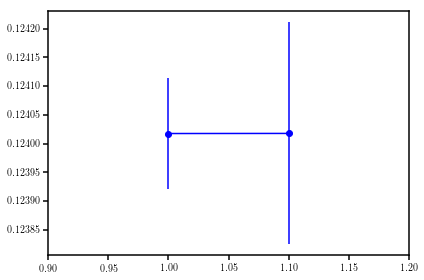

In [26]:
print('TEST Results')
print('-----------------')
print('IDL Marg depth = ', IDL_marg_rl, ' +/- ', IDL_marg_rl_err)
print('PY Marg depth = ', py_marg_rl, ' +/- ', py_marg_rl_err)

plt.errorbar([1,1.1],[IDL_marg_rl,py_marg_rl], yerr=[IDL_marg_rl_err,py_marg_rl_err], color='blue', marker='o')
plt.xlim(0.9,1.2)
plt.tight_layout()
plt.show()

(22, 50)


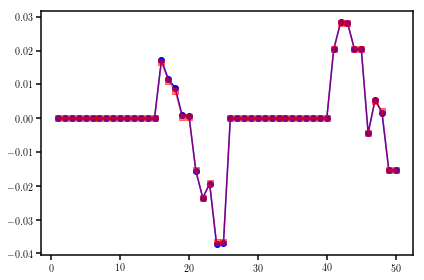

In [32]:
xarray = np.linspace(1,len(py_w_q),len(py_w_q))
print(np.shape(IDL_sys_params_err))


plt.plot(xarray, IDL_sys_params[16,:], color='b', marker='o')
plt.plot(xarray, py_sys_params[:,16], color='r', marker='s',alpha=0.5)
# plt.hlines(0.0,-2,55)
plt.tight_layout()
plt.show()


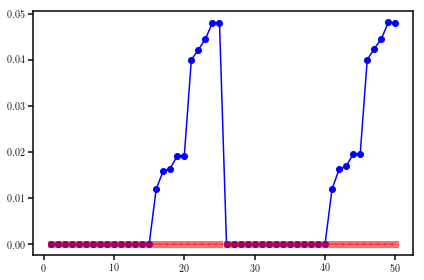

1.5244814395219088
-0.0034705903133732327 -0.004799235673496886


In [33]:
plt.plot(xarray, IDL_sys_params_err[16,:], color='b', marker='o')
plt.plot(xarray, py_sys_params_err[:,16], color='r', marker='s',alpha=0.5)
# plt.hlines(0.0,-2,55)
plt.tight_layout()
plt.show()

# 1.5244813970993492
print(IDL_sys_params[3,0])
print(np.sum(IDL_sys_params[16,:]), np.sum(py_sys_params[:,16]))

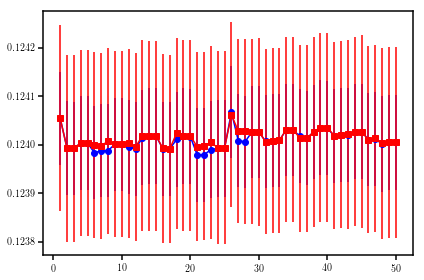

In [7]:
xarray = np.linspace(1,len(py_w_q),len(py_w_q))

plt.errorbar(xarray, IDL_sys_depth, yerr=IDL_sys_depth_err, color='b', marker='o')
plt.errorbar(xarray, py_sys_depth, yerr=py_sys_depth_err, color='r', marker='s')
plt.tight_layout()
plt.show()

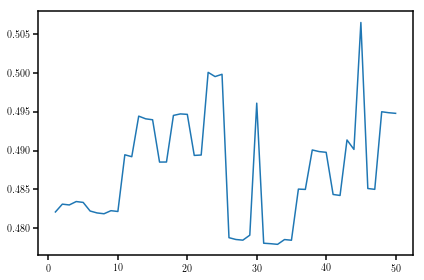

In [8]:
xarray = np.linspace(1,len(py_w_q),len(py_w_q))

plt.plot(xarray,(py_sys_depth_err-IDL_sys_depth_err)/np.max(py_sys_depth_err))
plt.tight_layout()
plt.show()

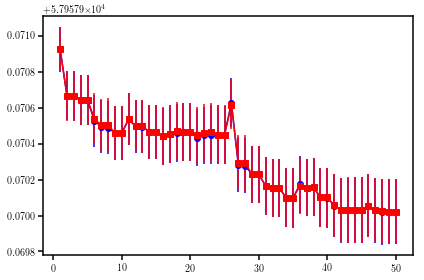

In [9]:
xarray = np.linspace(1,len(py_w_q),len(py_w_q))

plt.errorbar(xarray, IDL_sys_epoch, yerr=IDL_sys_epoch_err, color='b', marker='o')
plt.errorbar(xarray, py_sys_epoch, yerr=py_sys_epoch_err, color='r', marker='s')
plt.tight_layout()
plt.show()

In [10]:
top_idl = np.where(IDL_w_q > 0.05)
print(top_idl)

top_py = np.where(py_w_q > 0.05)
print(top_py)

(array([30, 31, 33, 40, 41, 45, 46]),)
(array([30, 31, 33, 40, 41, 45, 46]),)


In [11]:
print(IDL_sys_evidenceaic)

[335.60326569 345.808891   345.30887287 345.21090638 344.70036493
 350.62715541 351.01570479 350.65244495 350.67580827 350.16861427
 350.1255679  350.48510643 350.30248792 350.22488429 349.71775104
 350.50260242 350.15138478 349.86668132 349.68638354 349.17854292
 350.32355255 350.01057957 349.55202293 349.49971542 348.99174563
 348.00497751 361.68594041 361.23616465 361.74166231 361.23949802
 365.60419981 365.28637966 364.81580689 365.46378566 364.9634593
 365.12470997 364.79525504 364.40096089 364.96821044 364.46780917
 365.88455932 365.605945   365.10539284 364.91302082 364.41265828
 365.58955856 365.27672359 364.80488922 364.73188028 364.23172892]


In [12]:
print(py_sys_evidenceAIC)

[335.60359724 345.80936253 345.30932603 345.21144298 344.70103986
 350.63534441 351.01915492 350.66387246 350.67661774 350.16945682
 350.13127897 350.4879704  350.30528155 350.22608888 349.71893374
 350.50609837 350.15511263 349.87560408 349.68834812 349.18116596
 350.33344229 350.02279577 349.56249393 349.5015991  348.99454502
 348.00869915 361.70136789 361.24994353 361.74242948 361.24325885
 365.60492187 365.28691528 364.81630934 365.46415127 364.96366376
 365.12704514 364.79588092 364.40153922 364.96843973 364.46793828
 365.88469316 365.60591031 365.10506051 364.91323647 364.41559845
 365.59030523 365.27635889 364.8044413  364.73224642 364.2319833 ]


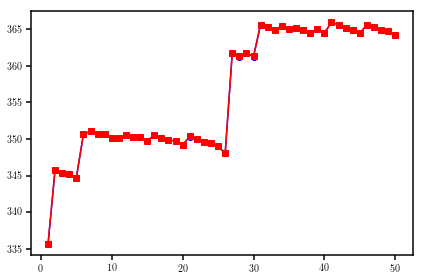

In [13]:
xarray = np.linspace(1,len(py_w_q),len(py_w_q))

plt.plot(xarray, IDL_sys_evidenceaic, color='b', marker='o')
plt.plot(xarray, py_sys_evidenceAIC, color='r', marker='s')
plt.tight_layout()
plt.show()

In [14]:
analysis = scipy.io.readsav('/Users/hwakeford/Documents/GitHub/HST_Marginalization/outputs/run1_scatter_wl_time_wm3d.sav', verbose=False)
IDL_sys_wscatter = analysis['w_scatter']
IDL_sys_wparams = analysis['w_params']


py_analysis = np.load('/Users/hwakeford/Documents/GitHub/HST_Marginalization/outputs/run1_scatter_wl_time_wm3d.npz')
py_sys_wscatter = (py_analysis['w_scatter'])
py_sys_wparams = (py_analysis['w_params'])

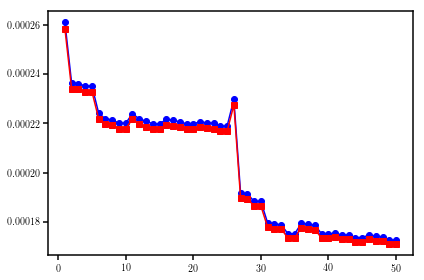

In [15]:
xarray = np.linspace(1,len(py_w_q),len(py_w_q))

plt.plot(xarray, IDL_sys_wscatter, color='b', marker='o')
plt.plot(xarray, py_sys_wscatter, color='r', marker='s')
plt.tight_layout()
plt.show()

(22, 50) (50, 22)


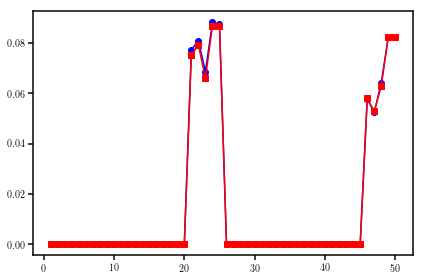

In [16]:
xarray = np.linspace(1,len(py_w_q),len(py_w_q))
print(np.shape(IDL_sys_wparams),np.shape(py_sys_wparams))
plt.plot(xarray, IDL_sys_wparams[-5,:], color='b', marker='o')
plt.plot(xarray, py_sys_wparams[:,-5], color='r', marker='s')
plt.tight_layout()
plt.show()

In [17]:
print(np.shape(IDL_sys_rawflux_err),np.shape(IDL_sys_rawflux),np.shape(IDL_sys_date))

(51, 50) (51, 50) (51, 50)


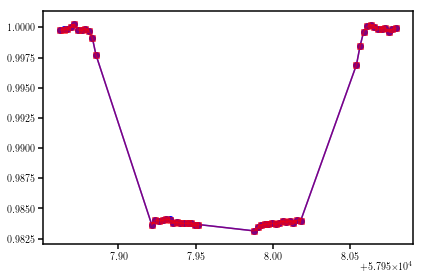

In [18]:
plt.errorbar(IDL_sys_date[:,26], IDL_sys_flux[:,26], yerr=IDL_sys_flux_err[:,26], color='b', marker='o')
plt.errorbar(py_sys_date[26], py_sys_flux[26], yerr=py_sys_flux_err[26], color='r', marker='s',alpha=0.5)
plt.tight_layout()
plt.show()

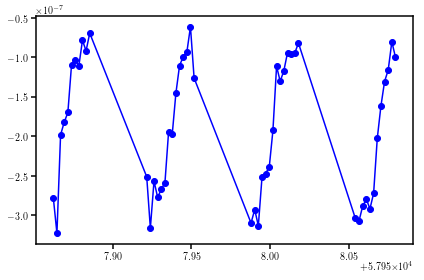

In [19]:
plt.plot(IDL_sys_date[:,1], IDL_sys_flux[:,1]-py_sys_flux[1], color='b', marker='o')
# plt.errorbar(py_sys_date[26], py_sys_flux[26], yerr=py_sys_flux_err[26], color='r', marker='s',alpha=0.5)
plt.tight_layout()
plt.show()

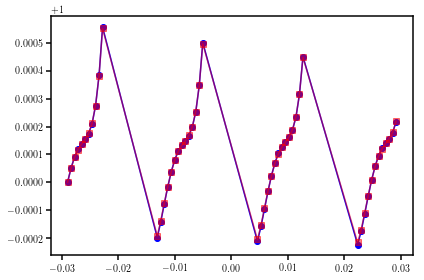

In [20]:
plt.plot(IDL_sys_phase[:,20], IDL_sys_systematic_model[:,20], color='b', marker='o')
# plt.plot(IDL_sys_phase[:,26], IDL_sys_systematic_model[:,26], color='c', marker='o', alpha=0.5)

plt.plot(py_sys_phase[20], py_sys_systematic_model[20], color='r', marker='s',alpha=0.5)
# plt.plot(py_sys_phase[26], py_sys_systematic_model[26], color='g', marker='s',alpha=0.5)
plt.tight_layout()
plt.show()